## Heavy Traffic Indicators on I-94

This project explores a dataset about the westbound traffic on the [I-94 interstate highway](https://en.wikipedia.org/wiki/Interstate_94). Our goal is to determine a few indicators of heavy traffic on I-94.

The dataset was made by John Hogue and is downloadable from this [link](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

In [1]:
import pandas as pd
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Analyzing traffic data
Let's start by analyzing the distribution `traffic_volume` column.

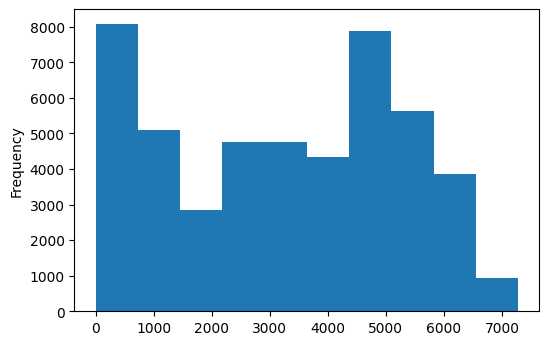

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The traffic volume recorded during the study period ranges from 0 to 7280. Averge volume is 3260. About 25% of the time, there are fewer than 1193 cars passing the station recording the data, which is probably contributed by the time. 

Let's compare the daytime and nighttime data. A very rough way to divide the dataset into two would be classifying them using the 7am/pm mark:
* Daytime data: hours from 7AM to 7PM 
* Nighttime data: hours from 7PM to 7AM

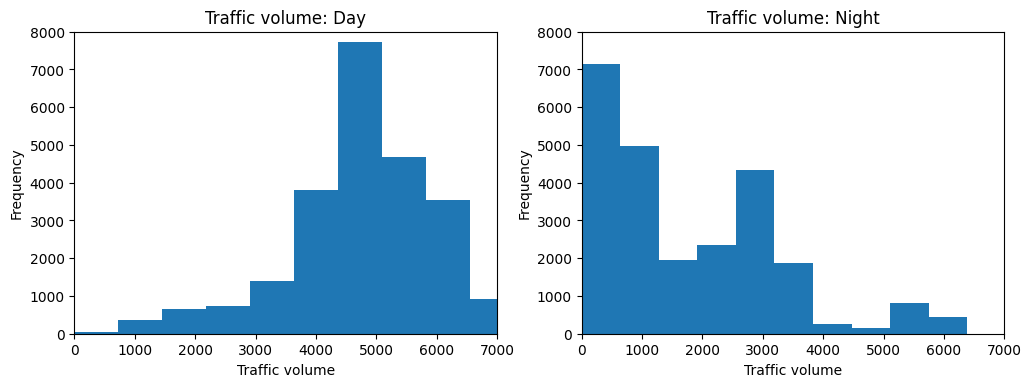

In [6]:
i94['date_time'] = pd.to_datetime(i94['date_time'])

i94_day = i94.copy()[(i94['date_time'].dt.hour >= 7) & 
              (i94['date_time'].dt.hour < 19)]

i94_night = i94.copy()[(i94['date_time'].dt.hour < 7) | 
              (i94['date_time'].dt.hour >= 19)]

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('Traffic volume: Day')
plt.hist(i94_day['traffic_volume'])
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(0,7000)
plt.ylim(0,8000)

plt.subplot(1, 2, 2)
plt.title('Traffic volume: Night')
plt.hist(i94_night['traffic_volume'])
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(0,7000)
plt.ylim(0,8000)

plt.show()



In [7]:
i94_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
i94_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histograms show that day time traffic is skewed to the left. Traffic volume is higher than 4762 75% of the time.

Night time traffic is positively skewed: most of the time the traffic is low. 75% of the time the volume is less than 2819. 

Although there are some instances of high traffic at night, the traffic volume at night is generally low. As the current project focuses on finding indicators of heavy traffic, we will focus on the daytime data from now on.

### Time Indicators

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day



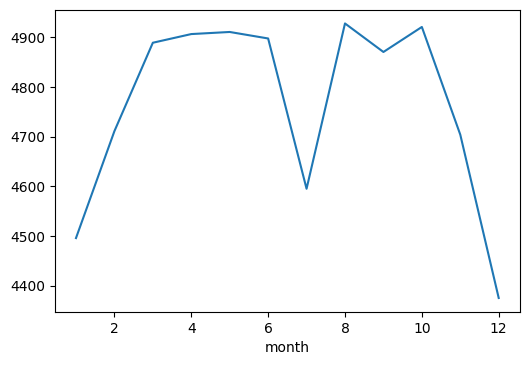

In [9]:
i94_day['month'] = i94_day['date_time'].dt.month
by_month = i94_day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

The traffic is higher during warmer months (March-October) and lower in winter (November-February), with the exception of July. Is it the same every July during the period?

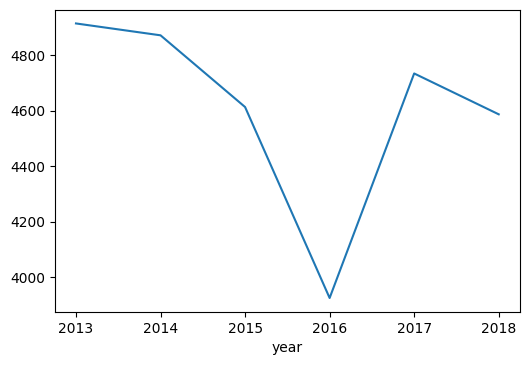

In [10]:
i94_day['year'] = i94_day['date_time'].dt.year
july_data = i94_day[i94_day['month'] == 7]
july_data.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Traffic is typically heavy in July (above 4600) with the exception of 2016. Some anomaly that is specific to this month is causing a dip in the overall average of July. 

If we ignore the 2016 July data, we can say that generally traffic is higher during warmer months, with an average of close to 5000 cars during daytime.



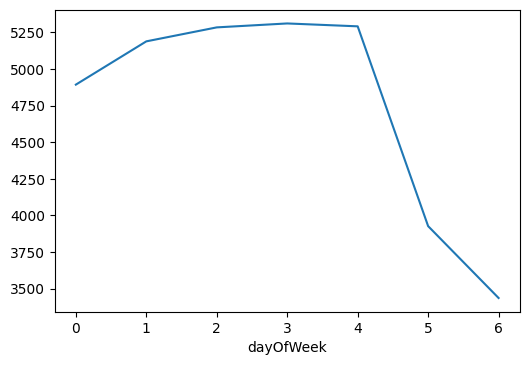

In [11]:
i94_day['dayOfWeek'] = i94_day['date_time'].dt.dayofweek
i94_day.groupby('dayOfWeek').mean()['traffic_volume'].plot.line()
plt.show()

Daytime traffic is higher during weekdays (mostly higher than 5000), and lighter on weekends (lower than 4000).


Below we will study how the hour affect traffic volume. Since traffic volume on business day and weekends are greatly difference, we will study the hourly data on a business day and weekend separately.

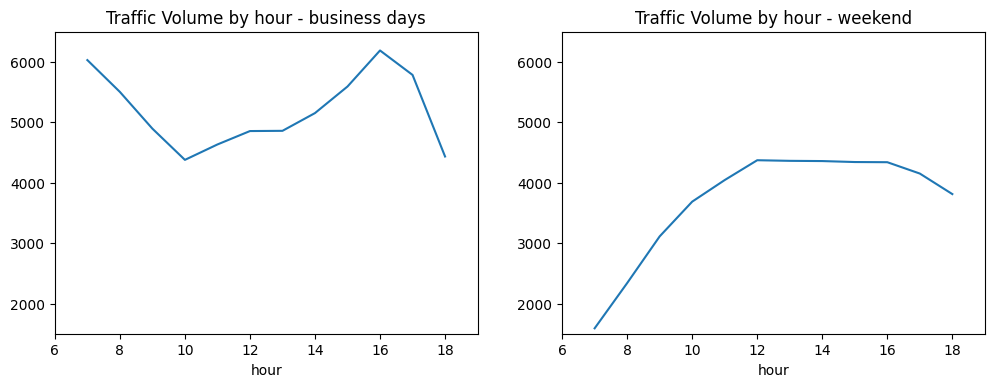

In [12]:
i94_day['hour'] = i94_day['date_time'].dt.hour
business_days = i94_day.copy()[i94_day['dayOfWeek'] <= 4] 
weekend = i94_day.copy()[i94_day['dayOfWeek'] >= 5] 
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume by hour - business days')
plt.ylim(1500,6500)
plt.xlim(6,19)


plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume by hour - weekend')
plt.ylim(1500,6500)
plt.xlim(6,19)

plt.show()


Generally, traffic volume at a specific hour is higher on a business day than weekend. On a business day, rush hour is at 7am and 4pm. On a weekend, traffic early in the monring is significantly lower than morning traffic on a business day as well as the rest of daytime on a weekend. 

To summarize all findings regarding time indicators for heavy traffic:
* Traffic is generally heavier in a warmer month (March-October) than colder months
* Traffic is generally heavier on a business day
* Rush hour is at 7 and 16 hour on a business day

### Weather indicators

The dataset provides us with some information about the weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`. 

First, we look into the correlation between the numerica columns and traffic.

In [13]:
i94_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayOfWeek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The column `temp` representing Temperature has the strongest correlation with `traffic_volume`.  Below is the scatter plot between the two variables.

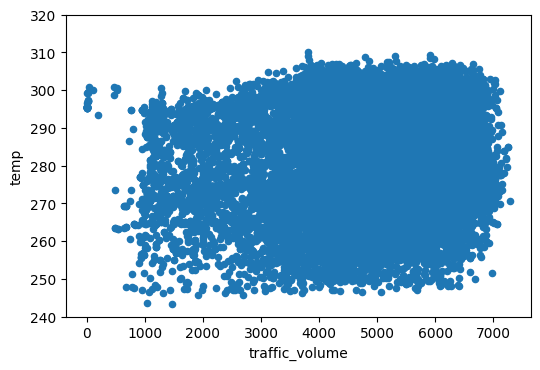

In [17]:
i94_day.plot.scatter('traffic_volume','temp')
plt.ylim(240,320)
plt.show()

There's no trend visible in the graph. Temperature doesn't seem to have a reliable indicator of heavy traffic. The correlation of other numerical columns have even lower correlation with heavy traffic.

### Weather categorical data

Weather data in `weather_main` and `weather_description` are studied below:

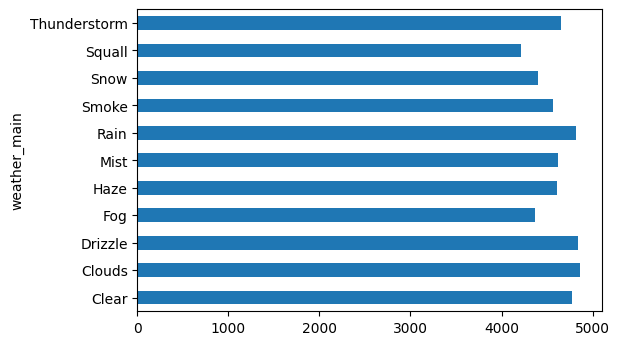

In [18]:
by_weather_main = i94_day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

No weather type exceed 5000 cars. Let's look into more granular data in the `weather_description` column.

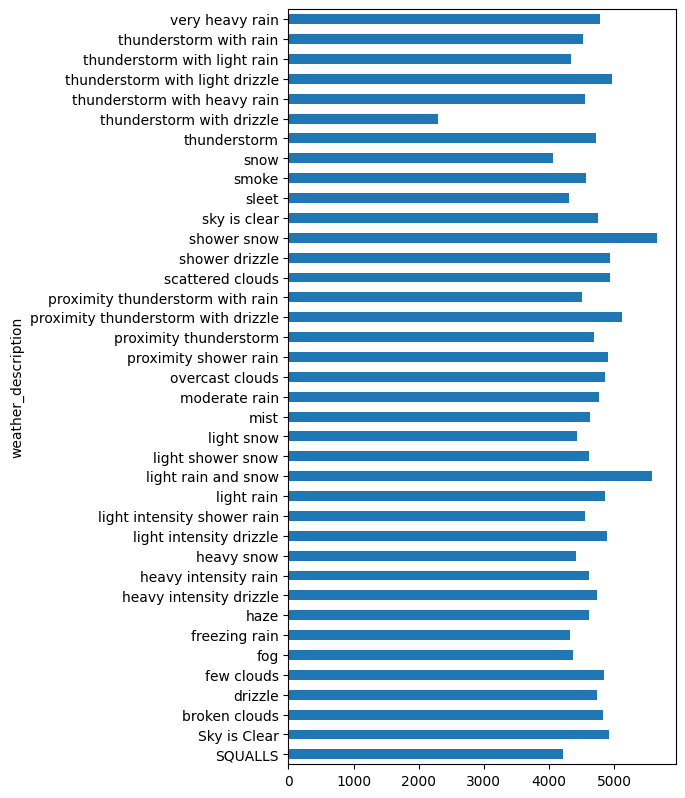

In [20]:
by_weather_description = i94_day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

Under the following weather types, traffic volume will exceed 5000:
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

High volume corresponds to moderately poor weather, perhaps due to the fact that people prefer driving their own cars instead of car-pooling or using public transport/ biking. 

## Conclusion
We studied the traffic volume dataset and found two type of indicators that relates to i94 westbound traffic during daytime: 
* Time indicators
    * Traffic is generally heavier in a warmer month (March-October) than colder months
    * Traffic is generally heavier on a business day
    * Rush ho ur is at 7 and 16 hour on a business day
* Weather Indicators
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle